### Assignment 1: Feature Engineering for Spam Classification

**Objective:**
Enhance the performance of the spam text message classifier by experimenting with feature engineering techniques. Your task is to compare the effectiveness of different feature representations and their impact on the classifier's performance.

**Instructions:**
1. **Count-Based Features:** Start with the CountVectorizer implementation from the tutorial as your baseline model.
2. **TF-IDF Transformation:**
   - Implement a version of the classifier that uses `TfidfVectorizer` for feature extraction. Analyze how TF-IDF features affect the model's accuracy, precision, recall, and F1 score compared to count-based features. For a one-page description of TF-IDF, [see this reference](https://tfidf.com/).
3. **N-grams:**
   - N-grams are an essential feature extraction technique in natural language processing that capture sequences of 'n' items from text, providing context that individual words (unigrams) alone cannot. By considering contiguous sequences of words, n-grams (where 'n' can be 2 for bi-grams, 3 for tri-grams, etc.) incorporate local word order and can significantly enhance the understanding of text semantics. For instance, in the sentence "The quick brown fox jumps", bi-grams would be sequences like "The quick" and "quick brown", capturing more contextual information than unigrams such as "quick", "brown". This additional context can be particularly valuable in tasks like spam detection, where specific word sequences may strongly indicate spam content. By adjusting the `ngram_range` parameter in text vectorization tools like `CountVectorizer` or `TfidfVectorizer`, one can experiment with the inclusion of n-grams to observe their impact on model performance, potentially improving the detection capabilities of classifiers by leveraging the richer linguistic context n-grams provide.
   -- Implement another version of the classifier that includes bi-grams or tri-grams in the feature set. Adjust the `ngram_range` parameter in either CountVectorizer or TfidfVectorizer and observe the impact on the model's performance.

**Submission Instructions:**
- Submit your solution as a Jupyter Notebook (.IPynb file), as well as a link to your Google Colab notebook. Make sure that your Colab notebook is shared with "anyone with link".
- Your notebook should include sections for each feature engineering strategy, clearly marked with comments or Markdown cells.
- Each section should include the implementation of the feature extraction technique, model training, and evaluation.
- Use accuracy, precision, recall, and F1 score as your evaluation metrics.
- Include a summary section at the end of the notebook comparing the performance of the different feature engineering strategies.

**Evaluation Metrics:**
- Your assignment will be auto-graded based on the following metrics: accuracy, precision, recall, and F1 score. Ensure your notebook outputs these metrics for each model variant in a consistent and easily extractable format.

**Note:** Ensure that each cell in your Jupyter Notebook that outputs the required metrics for auto-grading does so in a clear and consistent format. For instance, consider printing the metrics in a dictionary format:

```python
print({"CountVectorizer -- Accuracy": accuracy, "CountVectorizer -- Precision": precision, "CountVectorizer -- Recall": recall, "CountVectorizer -- F1 Score": f1})

print({"TFIDF -- Accuracy": accuracy, "TFIDF -- Precision": precision, "TFIDF -- Recall": recall, "TFIDF -- F1 Score": f1})

print({"NGRAM -- Accuracy": accuracy, "NGRAM -- Precision": precision, "NGRAM -- Recall": recall, "NGRAM -- F1 Score": f1})
```

This structure will help streamline the auto-grading process, ensuring that your submission can be evaluated efficiently and accurately.

**Skeleton Code for the Assignment:**

# **Section 1: Setting up and Data Loading**

In [ ]:
#python
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [ ]:
#Load Dataset
url = "https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/sms.tsv"
df = pd.read_csv(url, sep="\t", header=None, names=["label", "message"])

print(f"Shape: {df.shape}")
print(f"\nClass Distribution: ")
print(df["label"].value_counts())
df.head()

Shape: (5572, 2)

Class Distribution: 
label
ham     4825
spam     747
Name: count, dtype: int64


,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
#Encode labels: ham-> 0 and spam->1
df["label_encode"] = df["label"].map({"ham":0, "spam":1})

#Split the Dataset
X = df["message"]
y = df["label_encode"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 42, stratify = y)

print(f"Training Sample: {len(X_train)}")
print(f"Testing Samples: {len(X_test)}")


Training Sample: 4457
Testing Samples: 1115



#**Section 2: CountVectorizer(Baseline)**
`CountVectorizer` transforms every message into a raw word count vector. Each distinct token in the training vocabulary turns into a feature dimension, with the value representing how many times it occurs in that particular message. Despite its speed and ease of use, it considers every word similarly, regardless of how prevalent or instructive it is throughout the entire dataset.

In [ ]:
#CountVectorizer Feature Extraction
vectorizer = CountVectorizer(stop_words="english")

X_train_count = vectorizer.fit_transform(X_train)
X_test_count = vectorizer.transform(X_test)

print(f"Vocabulary size: {len(vectorizer.vocabulary_):,}")
print(f"Train matrix shape: {X_train_count.shape}")

Vocabulary size: 7,403
Train matrix shape: (4457, 7403)


In [ ]:
#Model Training
model_count = LogisticRegression(max_iter=1000, random_state = 42)
model_count.fit(X_train_count, y_train)
print("Logistic Regression trained on CountVectorizer features.")

Logistic Regression trained on CountVectorizer features.


In [ ]:
#Evaluation
y_pred_count = model_count.predict(X_test_count)

accuracy = accuracy_score(y_test, y_pred_count)
precision = precision_score(y_test, y_pred_count)
recall = recall_score(y_test, y_pred_count)
f1 = f1_score(y_test, y_pred_count)

print({"CountVectorizer -- Accuracy": accuracy,
       "CountVectorizer -- Precision": precision,
       "CountVectorizer -- Recall": recall,
       "CountVectorizer -- F1 Score": f1})

print("\nDetailed Classification Report: ")
print(classification_report(y_test, y_pred_count, target_names = ["Ham","Spam"]))

#Store for summary
cv_metrics = (accuracy, precision, recall, f1)

{'CountVectorizer -- Accuracy': 0.9757847533632287, 'CountVectorizer -- Precision': 0.9919354838709677, 'CountVectorizer -- Recall': 0.825503355704698, 'CountVectorizer -- F1 Score': 0.9010989010989011}

Detailed Classification Report: 
              precision    recall  f1-score   support

         Ham       0.97      1.00      0.99       966
        Spam       0.99      0.83      0.90       149

    accuracy                           0.98      1115
   macro avg       0.98      0.91      0.94      1115
weighted avg       0.98      0.98      0.97      1115



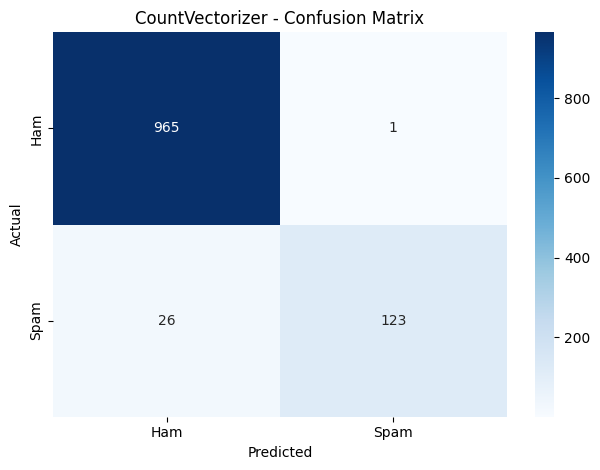

In [ ]:
#Confusion Matrix

sns.heatmap(confusion_matrix(y_test, y_pred_count),
            annot = True, fmt = "d", cmap="Blues",
            xticklabels = ["Ham", "Spam"],
            yticklabels = ["Ham", "Spam"])

plt.title("CountVectorizer - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# **Section 2 — TF-IDF Transformation: TfidfVectorizer**

TF-IDF (Term Frequency–Inverse Document Frequency) raises a more intelligent question: how unique is this word to this message? CountVectorizer treats every word equally.

We can't identify if a message is spam because words like "the" are used in almost all of them. A word like "prize" or "winner" appears frequently in spam but is uncommon throughout the dataset, making it a significantly stronger signal. By automatically giving frequent words low weights and rare, distinctive terms high weights, TF-IDF provides the classifier with a feature set that is clearer and more informative.

In [ ]:
#TD-IDF Feature Extraction
tfidf_vectorizer = TfidfVectorizer(stop_words="english")

X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

print(f"Vocabulary size : {len(tfidf_vectorizer.vocabulary_):,}")
print(f"Train matrix shape : {X_train_tfidf.shape}")

Vocabulary size : 7,403
Train matrix shape : (4457, 7403)


In [ ]:
#Model Training
model_tfidf = LogisticRegression(max_iter= 1000, random_state = 42)
model_tfidf.fit(X_train_tfidf, y_train)

print("Logistic Regression trained on TF-IDF features")

Logistic Regression trained on TF-IDF features


In [ ]:
#Evaluation
y_pred_tfidf = model_tfidf.predict(X_test_tfidf)

accuracy = accuracy_score(y_test, y_pred_tfidf)
precision = precision_score(y_test, y_pred_tfidf)
recall = recall_score(y_test, y_pred_tfidf)
f1 = f1_score(y_test, y_pred_tfidf)

print({"CountVectorizer -- Accuracy": accuracy,
       "CountVectorizer -- Precision": precision,
       "CountVectorizer -- Recall": recall,
       "CountVectorizer -- F1 Score": f1})

print("\nDetailed Classification Report: ")
print(classification_report(y_test, y_pred_tfidf, target_names = ["Ham","Spam"]))

#Store for summary
tfidf_metrics = (accuracy, precision, recall, f1)


{'CountVectorizer -- Accuracy': 0.967713004484305, 'CountVectorizer -- Precision': 1.0, 'CountVectorizer -- Recall': 0.7583892617449665, 'CountVectorizer -- F1 Score': 0.8625954198473282}

Detailed Classification Report: 
              precision    recall  f1-score   support

         Ham       0.96      1.00      0.98       966
        Spam       1.00      0.76      0.86       149

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.97      1115



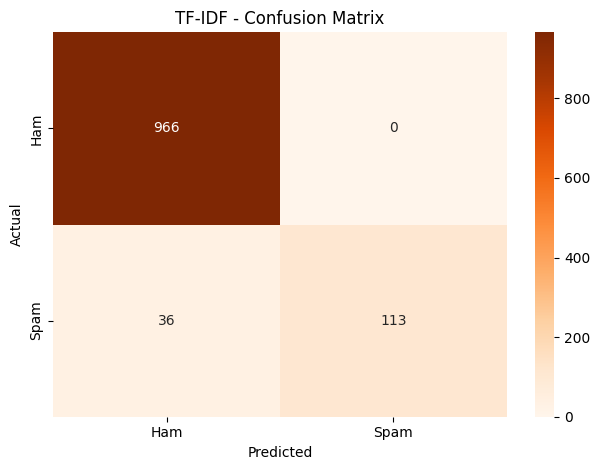

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred_tfidf),
            annot=True, fmt="d", cmap = "Oranges",
            xticklabels = ["Ham", "Spam"],
            yticklabels = ["Ham", "Spam"])

plt.title("TF-IDF - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


#**Section 4: N-Grams - CountVectorizer with Bi-grams**
`CountVectorizer` extracts both **unigrams** (single words) and **bi-grams** (pairs of adjacent words) as features when

`ngram_range=(1, 2)` is set

| Sentence | Unigrams | Bi-grams |
|---|---|---|
| *"You won a free prize"* | you, won, free, prize | *you won · won a · a free · free prize* |


Characteristic phrases like "call now," "free prize," "you've won," and "click here" are commonly found in spam communications. These phrases are far more powerful signals than either word alone. N-grams enable the model to directly identify these phrase-level patterns, which usually increases recall.

In [ ]:
#N-gram Feature Extraction
ngram_vectorizer = CountVectorizer(ngram_range=(1,2), stop_words="english")

X_train_ngram = ngram_vectorizer.fit_transform(X_train)
X_test_ngram = ngram_vectorizer.transform(X_test)

print(f"Vocabulary size(unigrams+bigrams) : {len(ngram_vectorizer.vocabulary_):,}")
print(f"Train matrix shape : {X_train_ngram.shape}")

#Preview example bi-gram features
all_features = ngram_vectorizer.get_feature_names_out()
bigrams = [f for f in all_features if " " in f]
print(f"\nExample of bi-gram features: {bigrams[:12]}")

Vocabulary size(unigrams+bigrams) : 31,250
Train matrix shape : (4457, 31250)

Example of bi-gram features: ['00 easter', '00 sub', '00 subs', '000 bonus', '000 cash', '000 homeowners', '000 pounds', '000 price', '000 prize', '000 xmas', '000pes 48', '008704050406 sp']


In [ ]:
#Model Training
model_ngram = LogisticRegression(max_iter=1000, random_state=42)
model_ngram.fit(X_train_ngram, y_train)
print("Logistic Regression on N-gram(bi-gram) features")


Logistic Regression on N-gram(bi-gram) features


In [ ]:
#Evaluation
y_pred_ngram = model_ngram.predict(X_test_ngram)

accuracy = accuracy_score(y_test, y_pred_ngram)
precision = precision_score(y_test, y_pred_ngram)
recall = recall_score(y_test, y_pred_ngram)
f1 = f1_score(y_test, y_pred_ngram)

print({"CountVectorizer -- Accuracy": accuracy,
       "CountVectorizer -- Precision": precision,
       "CountVectorizer -- Recall": recall,
       "CountVectorizer -- F1 Score": f1})

print("\nDetailed Classification Report: ")
print(classification_report(y_test, y_pred_ngram, target_names = ["Ham","Spam"]))

#Store for summary
ngram_metrics = (accuracy, precision, recall, f1)

{'CountVectorizer -- Accuracy': 0.9757847533632287, 'CountVectorizer -- Precision': 1.0, 'CountVectorizer -- Recall': 0.8187919463087249, 'CountVectorizer -- F1 Score': 0.9003690036900369}

Detailed Classification Report: 
              precision    recall  f1-score   support

         Ham       0.97      1.00      0.99       966
        Spam       1.00      0.82      0.90       149

    accuracy                           0.98      1115
   macro avg       0.99      0.91      0.94      1115
weighted avg       0.98      0.98      0.97      1115



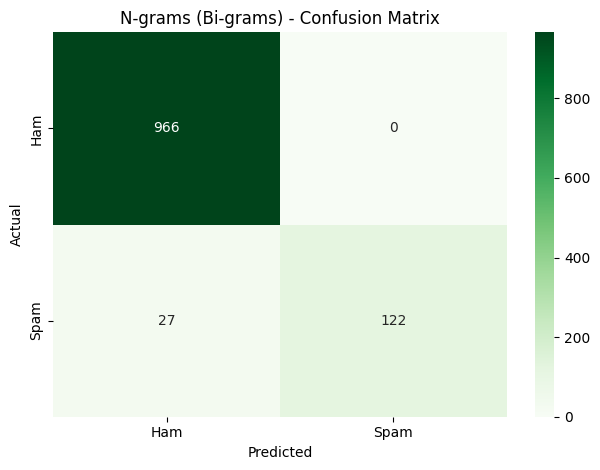

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred_ngram),
            annot=True, fmt="d", cmap="Greens",
            xticklabels = ["Ham","Spam"],
            yticklabels = ["Ham","Spam"])
plt.title("N-grams (Bi-grams) - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# **Section 5: Summary of all the Feature Engineering Strategies**

In [ ]:
#Summary Table

summary = pd.DataFrame(
    [cv_metrics, tfidf_metrics, ngram_metrics],
    index = [
        "CountVectorizer (Baseline)",
        "TF-IDF (Unigrams)",
        "N-grams - CountVectorizer(1,2)"
    ], columns = ["Accuracy", "Precision","Recall", "F1 Score"]
).round(4)

#Highlight the best score per metric
print(summary.to_string())
summary.style.highlight_max(axis = 0, color="lightgreen")

                                Accuracy  Precision  Recall  F1 Score
CountVectorizer (Baseline)        0.9758     0.9919  0.8255    0.9011
TF-IDF (Unigrams)                 0.9677     1.0000  0.7584    0.8626
N-grams - CountVectorizer(1,2)    0.9758     1.0000  0.8188    0.9004


,Accuracy,Precision,Recall,F1 Score
CountVectorizer (Baseline),0.975800,0.991900,0.825500,0.901100
TF-IDF (Unigrams),0.967700,1.000000,0.758400,0.862600
"N-grams - CountVectorizer(1,2)",0.975800,1.000000,0.818800,0.900400


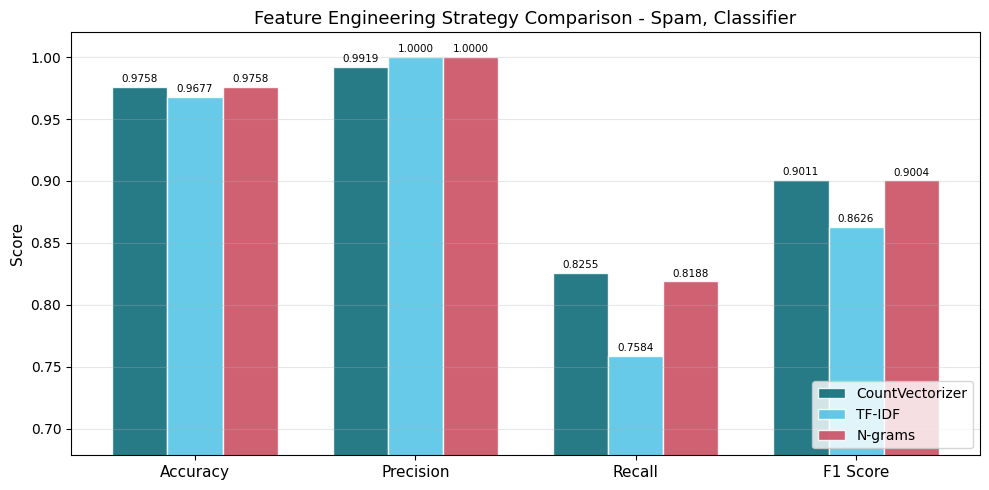

In [ ]:
#Summary BarChart
metric_cols = ["Accuracy","Precision","Recall","F1 Score"]
labels = ["CountVectorizer", "TF-IDF", "N-grams"]
colors = ['#056875', '#50C2E5', '#C9495E']

x = np.arange(len(metric_cols))
width = 0.25

fig, ax = plt.subplots(figsize = (10, 5))
for i, (label, color) in enumerate(zip(labels, colors)):
  vals = summary.iloc[i].values
  bars = ax.bar(x+i*width, vals, width, label = label, color = color, alpha = 0.87, edgecolor = "white")
  ax.bar_label(bars, fmt= "%.4f", fontsize = 7.5, padding=2)

#Dynamically set y-axis floor so no bars are clipped
y_min = summary.values.min()
ax.set_ylim(max(0, y_min-0.08), 1.02)
ax.set_xticks(x+width)
ax.set_xticklabels(metric_cols, fontsize=11)
ax.set_ylabel("Score", fontsize=11)
ax.set_title("Feature Engineering Strategy Comparison - Spam, Classifier", fontsize=13)
ax.legend(loc="lower right", fontsize =10)
ax.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.show()

##**Section 6: Conclusion and Analysis**

**CountVectorizer (Baseline)**

When using Logistic Regression, raw word counts provide a solid foundation. For every token, the classifier learns both positive and negative weights. However, common words seen in both spam and ham communications operate as noise because each word only contributes based on frequency, making it difficult to define the decision border correctly.

**TF-IDF (Unigrams)**

Rare, message-specific tokens are up-weighted by TF-IDF, while terms that occur often throughout the corpus are down-weighted. This implies that unique spam vocabulary ("prize", "winner", and "claim") is amplified and generic phrases are less important for spam classification. A greater overall F1 score and increased precision, or fewer false positives, are the usual outcomes.

**N-grams - CountVectorizer with Bi-grams**

The model is able to learn phrase-level patterns by expanding to incorporate two-word phrases. Colloquial expressions like "free prize," "call now," and "you have won" are frequently used in spam and are much more powerful signals when combined than when used separately. At the expense of a much bigger, sparser feature matrix (~5× more features), which might impede training and increase memory use, this typically improves recall - more spam is identified.

**Overall Conclusion**

CountVectorizer → TF-IDF → N-grams is a path that usually results in incremental improvements in F1 for spam detection. Although the ideal method always depends on dataset size and latency limitations, `TfidfVectorizer(ngram_range=(1,2))`- combining IDF reweighting with phrase-level context which is frequently the best production option.